# Question de gaetan

https://www.yammer.com/michelin.com/#/Threads/show?threadId=728531149766656

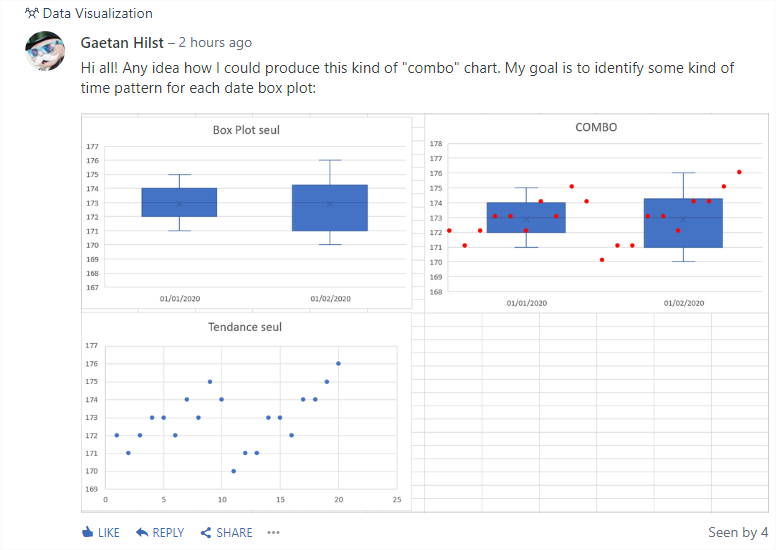

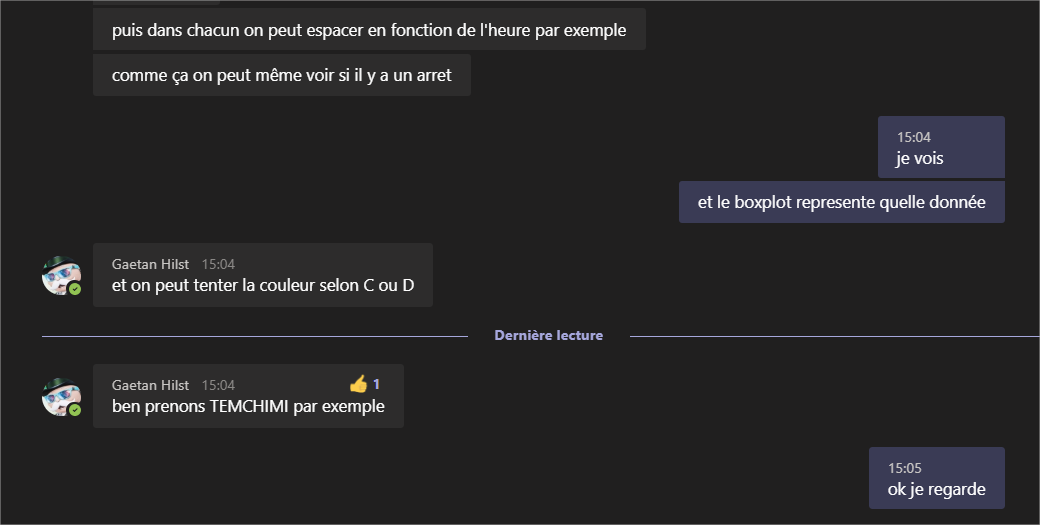

# 1ere option avec seaborn

## chargement des données

In [34]:
import pandas as pd

filename = 'DATASET_ML25307.xlsx'

df_ml25307 = pd.read_excel(filename, parse_dates=[['Date', 'Heure']])

In [35]:
df_ml25307.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3201 entries, 0 to 3200
Data columns (total 27 columns):
Date_Heure      3201 non-null datetime64[ns]
SITE Z          3201 non-null object
Gr              3201 non-null int64
Appellation     3201 non-null object
M. Mécanique    3201 non-null object
Mél.            3201 non-null object
Clt             3201 non-null object
CADETHEO        3201 non-null int64
TMIVIDE         3201 non-null int64
THTMI           3201 non-null int64
TEMCHIMI        3201 non-null int64
TPRESMI         3201 non-null int64
TOCCUPMI        3201 non-null int64
DEGMAXMI        3201 non-null int64
ENERTOMI        3201 non-null float64
EVACMIHA        3201 non-null int64
TPRESHA         3201 non-null int64
TTRAVHA         3201 non-null int64
TACOUPHA        3201 non-null int64
QPULVHA         3201 non-null int64
TPRESHF         3201 non-null int64
TTRAVHF         3201 non-null int64
QPULVHF         3201 non-null float64
TACOUPHF        3201 non-null int64
MASSE      

In [36]:
df_ml25307.Date_Heure.min(), df_ml25307.Date_Heure.max(), 

(Timestamp('2019-01-14 02:00:00'), Timestamp('2019-09-28 18:19:00'))

In [37]:
df_ml25307['SITE Z'].value_counts()

OLS    3201
Name: SITE Z, dtype: int64

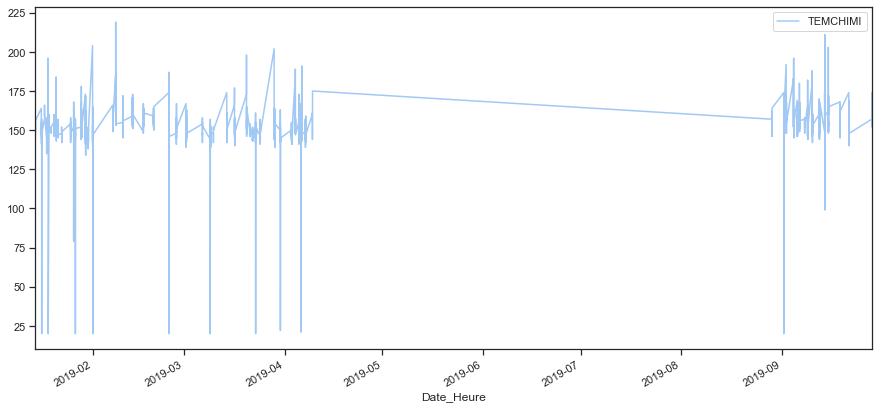

In [38]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(15,7))
df_ml25307[['Date_Heure', 'TEMCHIMI']].set_index('Date_Heure').plot(ax=ax)
plt.show()

### jour Michelin 

In [39]:
def ajoute_un_jour_Michelin(date, heureEquipeA):
    heure = date.hour
    if (heure < heureEquipeA):
        return date+np.timedelta64(24, 'h')
    return date

#print(ajoute_un_jour_Michelin(pd.to_datetime('2019-10-05 05:59:00'), heureEquipeA = 6))
#print(ajoute_un_jour_Michelin(pd.to_datetime('2019-10-05 06:01:00'), heureEquipeA = 6))

def dateMichelin_vers_dateCalendaire(df, heureEquipeA = 6):
    df_cop = df.copy()
    df_cop['Date_Heure']=df_cop['Date_Heure'].apply(lambda row:ajoute_un_jour_Michelin(row, heureEquipeA))
    return df_cop


In [40]:
df_ml25307_date_calendaire = dateMichelin_vers_dateCalendaire(df_ml25307, heureEquipeA=6)

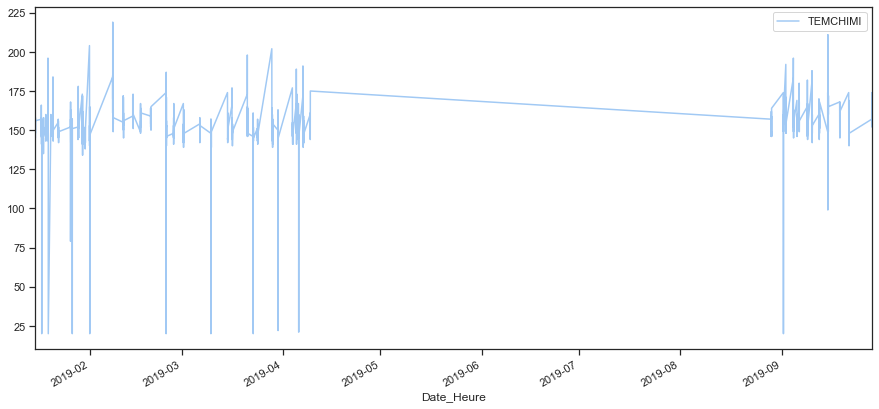

In [41]:
fig, ax = plt.subplots(figsize=(15,7))
df_ml25307_date_calendaire[['Date_Heure', 'TEMCHIMI']].set_index('Date_Heure').plot(ax=ax)
plt.show()

### split date et heure

In [42]:
df_ml25307_date_calendaire['Date'] = pd.to_datetime(df_ml25307_date_calendaire['Date_Heure']).dt.date
df_ml25307_date_calendaire['Time'] = pd.to_datetime(df_ml25307_date_calendaire['Date_Heure']).dt.time
df_ml25307_date_calendaire['Date'] = pd.to_datetime(df_ml25307_date_calendaire['Date'])

In [43]:
df_ml25307_date_calendaire.sort_values(by='Date_Heure', axis=0, ascending=True, inplace=True)
df_ml25307_date_calendaire.reset_index(inplace=True)

In [44]:
df_ml25307_date_calendaire

,index,Date_Heure,SITE Z,Gr,Appellation,M. Mécanique,Mél.,Clt,CADETHEO,TMIVIDE,...,QPULVHA,TPRESHF,TTRAVHF,QPULVHF,TACOUPHF,MASSE,TEVAC,FLUIDITE,Date,Time
0,0,2019-01-15 02:00:00,OLS,22,25307X02,225337Z02,C489,C,258,439,...,0,1002,952,4.8,36,354.6,468,%,2019-01-15,02:00:00
1,1,2019-01-15 02:03:00,OLS,22,25307X02,225337Z02,C490,D,284,42,...,0,1003,953,4.8,35,352.3,562,%,2019-01-15,02:03:00
2,2,2019-01-15 02:06:00,OLS,22,25307X02,225337Z02,C491,D,283,42,...,0,1003,953,4.9,35,352.7,447,%,2019-01-15,02:06:00
3,3,2019-01-15 02:09:00,OLS,22,25307X02,225337Z02,C492,D,280,42,...,0,1002,952,4.8,36,352.3,508,%,2019-01-15,02:09:00
4,4,2019-01-15 02:11:00,OLS,22,25307X02,225337Z02,C493,D,282,42,...,0,1002,952,4.9,36,352.5,472,%,2019-01-15,02:11:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3196,3196,2019-09-28 18:08:00,OLS,22,25307X02,225337Z00,B247,D,267,41,...,0,1002,952,4.9,36,351.9,494,%,2019-09-28,18:08:00
3197,3197,2019-09-28 18:11:00,OLS,22,25307X02,225337Z00,B248,D,263,41,...,0,1002,952,4.9,36,351.8,487,%,2019-09-28,18:11:00
3198,3198,2019-09-28 18:13:00,OLS,22,25307X02,225337Z00,B249,D,270,40,...,0,1001,952,4.9,36,351.5,460,%,2019-09-28,18:13:00
3199,3199,2019-09-28 18:16:00,OLS,22,25307X02,225337Z00,B250,D,264,42,...,0,1002,952,4.8,36,351.6,441,%,2019-09-28,18:16:00


### trim classement

In [45]:
df_ml25307_date_calendaire['Clt'] = df_ml25307_date_calendaire['Clt'].str.strip()

## seaborn

### boxplot + swarmplot

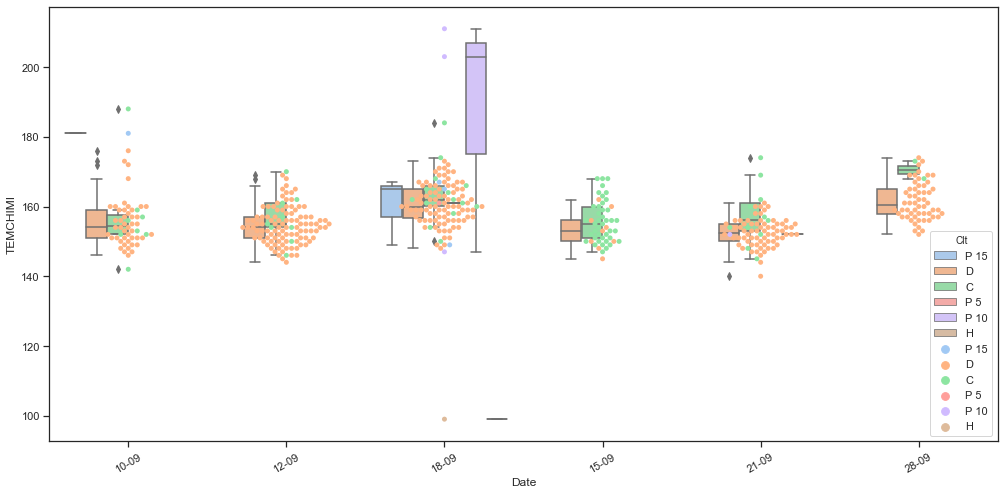

In [46]:
import seaborn as sns


df_sous_ensemble = df_ml25307_date_calendaire[df_ml25307_date_calendaire.Date >= '2019-09-10']

sns.set(style="ticks", palette="pastel")

fig_dims = (17, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#hue_order=['D', 'C', 'P 5', 'P 10', 'P 15', 'H'],
g1 = sns.boxplot(x="Date", y="TEMCHIMI", hue="Clt", data=df_sous_ensemble, ax=ax)
g2 = sns.swarmplot(x="Date", y="TEMCHIMI", hue="Clt", data=df_sous_ensemble, ax=ax)
xlabels =[pd.to_datetime(str(x)).strftime("%d-%m") for x in set(df_sous_ensemble['Date'].values)]
g1.set_xticklabels(xlabels, rotation=30)
g2.set_xticklabels(xlabels, rotation=30);


### violinplot + swarmplot

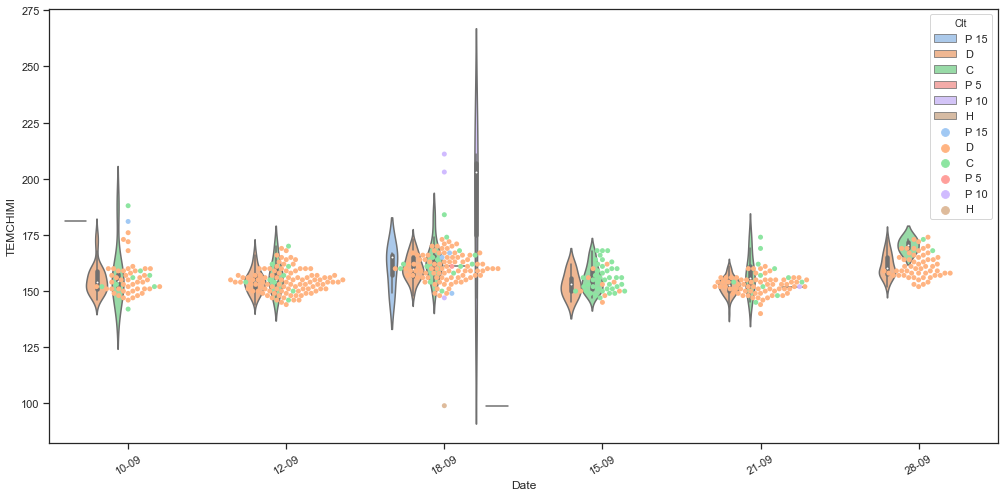

In [47]:
import seaborn as sns


df_sous_ensemble = df_ml25307_date_calendaire[df_ml25307_date_calendaire.Date >= '2019-09-10']
#df_sous_ensemble = df_sous_ensemble[df_sous_ensemble.Clt.isin(['D', 'C'])]

sns.set(style="ticks", palette="pastel")

fig_dims = (17, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#hue_order=['D', 'C', 'P 5', 'P 10', 'P 15', 'H'],
g1 = sns.violinplot(x="Date", y="TEMCHIMI", hue="Clt", data=df_sous_ensemble, ax=ax)
g2 = sns.swarmplot(x="Date", y="TEMCHIMI", hue="Clt", data=df_sous_ensemble, ax=ax)
xlabels =[pd.to_datetime(str(x)).strftime("%d-%m") for x in set(df_sous_ensemble['Date'].values)]
g1.set_xticklabels(xlabels, rotation=30)
g2.set_xticklabels(xlabels, rotation=30);



### violinplot with 2 sides

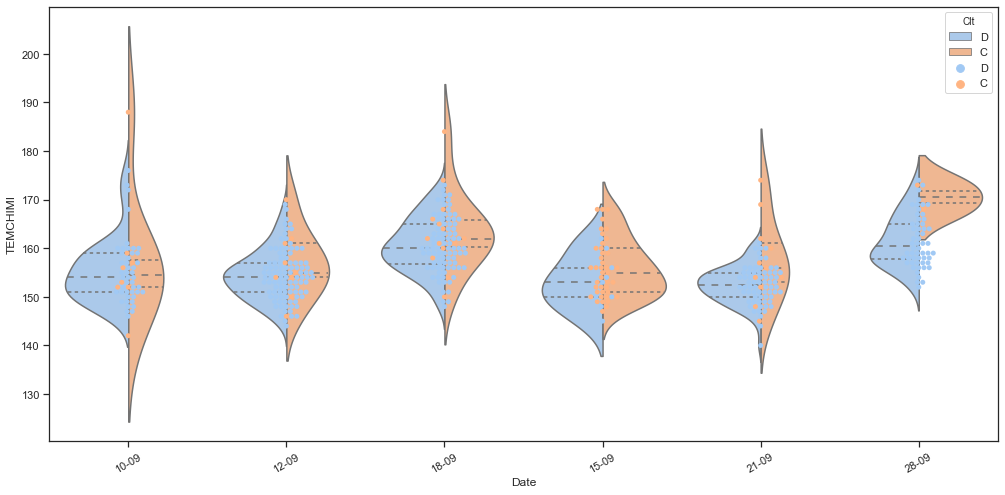

In [53]:
import seaborn as sns


df_sous_ensemble = df_ml25307_date_calendaire[df_ml25307_date_calendaire.Date >= '2019-09-10']
df_sous_ensemble_DC = df_sous_ensemble[df_sous_ensemble.Clt.isin(['D', 'C'])]

sns.set(style="ticks", palette="pastel")

fig_dims = (17, 8)
fig, ax = plt.subplots(figsize=fig_dims)
#hue_order=['D', 'C', 'P 5', 'P 10', 'P 15', 'H'],
g1 = sns.violinplot(x="Date", y="TEMCHIMI", hue="Clt", split=True, inner="quart",data=df_sous_ensemble_DC, ax=ax)
g2 = sns.swarmplot(x="Date", y="TEMCHIMI", hue="Clt", data=df_sous_ensemble_DC, ax=ax)
xlabels =[pd.to_datetime(str(x)).strftime("%d-%m") for x in set(df_sous_ensemble_DC['Date'].values)]
g1.set_xticklabels(xlabels, rotation=30)
g2.set_xticklabels(xlabels, rotation=30);

